In [1]:
import geopandas as gpd
import shapely.geometry as geo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('OK!')

OK!


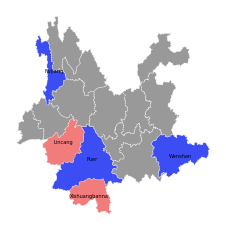

In [101]:
# 读取中国市级shp文件,并筛选云南省
china = gpd.read_file('区划/市.shp')
Yunnan = china.loc[china['省']=='云南省']
Yunnan.to_file('Yunnan.json')
Yunnan = gpd.read_file('Yunnan.json')

china['centroid'] = china.to_crs('+proj=cea').centroid.to_crs('EPSG:4326')
china_center = china.drop('geometry',axis=1)
china_center.set_geometry('centroid',inplace=True)
Yunnan_center = china_center.loc[china['省']=='云南省']
Yunnan_center.to_file('Yunnan_center.json')
Yunnan_center = gpd.read_file('Yunnan_center.json')

# plt.figure(figsize=(8,8))
ax = plt.gca()

YunanDirct = {'临沧市':'Lincang',
              '西双版纳傣族自治州':'Xishuangbanna',
              '普洱市':'Puer',
              '文山壮族苗族自治州':'Wenshan',
             '怒江傈僳族自治州':'Nvjiang'}

City = Yunnan.loc[:,'市'].to_list()
NonEA = ['普洱市','文山壮族苗族自治州','怒江傈僳族自治州']
EA = ['临沧市','西双版纳傣族自治州']

for idx, _ in enumerate(Yunnan.geometry.representative_point().to_crs('EPSG:2380')):
    region = Yunnan.loc[idx,'市']
    if region in YunanDirct:
        plt.text(_.x, _.y, YunanDirct[region], ha='center', va='center', size=5)
#         print(YunanDirct[region])

for i in City:
    if i in EA:
        a = Yunnan.loc[Yunnan['市']==i]
        a.to_crs('EPSG:2380').plot(ax=ax,facecolor='#e82624',
                                       edgecolor='white',
                                       linestyle='--',
                                       linewidth=.5,
                                       alpha=0.6)
    elif i in NonEA:
        a = Yunnan.loc[Yunnan['市']==i]
        a.to_crs('EPSG:2380').plot(ax=ax,facecolor='#0a21f0',
                                       edgecolor='white',
                                       linestyle='--',
                                       linewidth=.5,
                                       alpha=0.8)
    else:
        a = Yunnan.loc[Yunnan['市']==i]
        a.to_crs('EPSG:2380').plot(ax=ax,facecolor='Grey',
                                       edgecolor='white',
                                       linestyle='--',
                                       linewidth=.5,
                                       alpha=0.8)
        

# Yunnan.to_crs('EPSG:2380').plot(ax=ax,facecolor='grey',
#                                edgecolor='white',
#                                linestyle='--',
#                                linewidth=.5,
#                                alpha=0.8)
# Yunnan_center.representative_point().to_crs('EPSG:2380').plot(ax=ax,marker='s',color='orange')



plt.axis('off')
plt.savefig('YunnanField.png',dpi=1200)

In [64]:
print(Yunnan)

       省代码    省     市代码           市   类型                    geometry
0   530000  云南省  530100         昆明市  地级市  POINT (102.87289 25.38379)
1   530000  云南省  530300         曲靖市  地级市  POINT (103.93847 25.69828)
2   530000  云南省  530400         玉溪市  地级市  POINT (102.20141 24.13810)
3   530000  云南省  530500         保山市  地级市   POINT (98.97141 24.97499)
4   530000  云南省  530600         昭通市  地级市  POINT (104.00116 27.65101)
5   530000  云南省  530700         丽江市  地级市  POINT (100.52432 26.93854)
6   530000  云南省  530800         普洱市  地级市  POINT (100.71950 23.18162)
7   530000  云南省  530900         临沧市  地级市   POINT (99.67303 23.93758)
8   530000  云南省  532300     楚雄彝族自治州  自治州  POINT (101.56795 25.34839)
9   530000  云南省  532500  红河哈尼族彝族自治州  自治州  POINT (103.03448 23.43648)
10  530000  云南省  532600   文山壮族苗族自治州  自治州  POINT (104.71431 23.68721)
11  530000  云南省  532800   西双版纳傣族自治州  自治州  POINT (100.94427 21.92964)
12  530000  云南省  532900     大理白族自治州  自治州  POINT (100.03969 25.72545)
13  530000  云南省  533100  德宏傣族景颇族自治